## 시리즈 데이터 생성
1. 리스트
2. 딕셔너리
3. numpy : arange()
4. range()

- 시리즈 : 인덱스
- 인덱스 이름 : 시리즈변수명.index.name

- 시리즈의 값들 : 시리즈변수명.values

- 시리즈의 이름 : 시리즈변수명.name

In [ ]:
a = 5
b = 10
print(a+b)

In [1]:
import numpy as np
import pandas as pd

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
# 'all', 'last', 'none', 'last_expr'

In [ ]:
# a = 10
# print(a)
# b = 5
# b
# a  = b

# pandas 데이터 구조 #1. Series

## 1. Series 소개

- pandas의 기본 객체 중 하나
- numpy의 ndarray를 기반으로 **인덱싱 기능**을 추가하여 **1차원 배열**을 나타냄
- index를 지정하지 않으며 기본적으로 ndarray와 같이 0-based 인덱스 생성
- index를 지정할 경우 명시적으로 지정된 index를 사용
- 같은 타입의 0개 이상의 데이터를 가질 수 있음

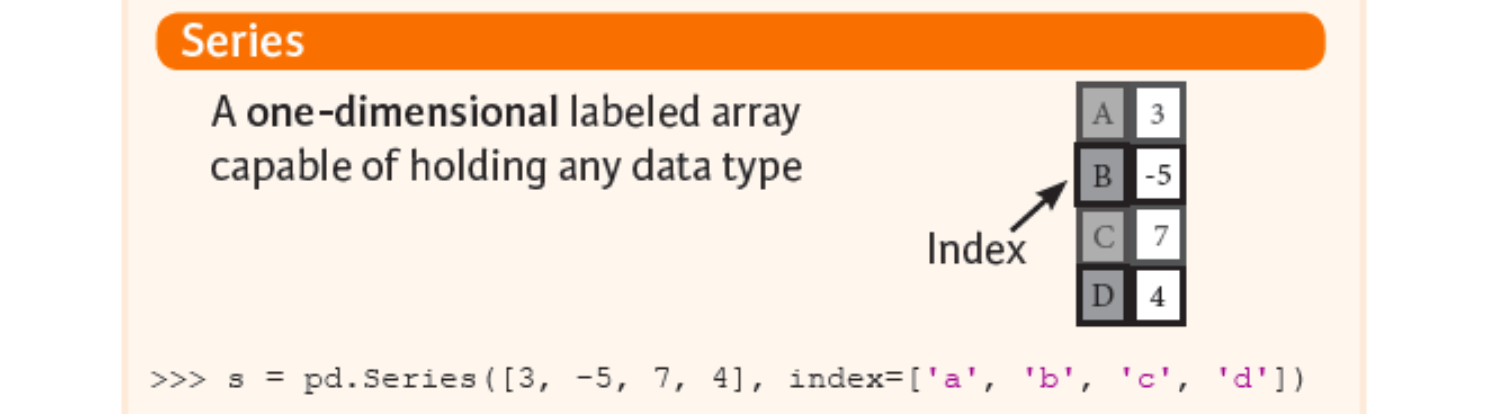

- 출처 : https://www.kdnuggets.com/2017/01/pandas-cheat-sheet.html

#### 시리즈의 자료구조
- 데이터가 순차적으로 나열된 1차원 배열 형태
- 인덱스(index)와 데이터 값(value)이 일대일로 대응
    - 딕셔너리와 비슷한 구조 : {key(index):value}

#### 시리즈의 인덱스
- 데이터 값의 위치를 나타내는 이름표 역할

#### 시리즈 생성 : 판다스 내장함수인 Series()이용
- 리스트, 딕셔너리, 튜플 등으로 시리즈 생성

## 2. Series 생성하기

**pd.Series(data=seq_data, index=None, dtype=None, name=None,...) 함수 이용**

- seq_data : array-like, Iterable, dict, or scalar value
- index : array-like or Index(1d)
- dtype : str, numpy.dtype, or ExtentionDtype
- name : str, optional (시리즈의 이름)

### 1) seq_data를 이용하여 Series 생성

- index를 지정하지 않아도 자동적으로 생성됨 : 0부터 숫자로 생성됨

#### ① 리스트로 시리즈 만들기

In [7]:
# 리스트로 시리즈를 생성, 인덱스 없이 지정(자동으로 정수인덱스(0-based) 생성)
s = pd.Series([10,20,30,40,50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [9]:
# 문자열을 갖는 시리즈 생성
s2 = pd.Series(['a','b','c','d'])
s2

0    A
1    B
2    C
3    D
dtype: object

In [ ]:
s2 = pd.Series('A B C D'.split())
s2

#### ② 정수 범위 자료를 시리즈로 생성
- range() / np.arange() 함수 사용

In [11]:
# range() 함수를 사용한 시리즈
s = pd.Series(range(1, 11))
s

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

In [13]:
# numpy.arange() 함수
s = pd.Series(np.arange(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

#### ③ 결측값을 포함한 시리즈 생성
- 결측값 NaN : numpy 모듈 nan 사용
- 결측값 생성을 위해 numpy 모듈 임포트

In [14]:
pd.Series([1,3,10,np.nan,5,100])

0      1.0
1      3.0
2     10.0
3      NaN
4      5.0
5    100.0
dtype: float64

#### ④ 딕셔너리로 시리즈 생성
- **Series({key1:value1, key2:value2, key3:value3, ... })**
    - 인덱스 -> key
    - 값 -> value

In [16]:
s = pd.Series({'hong':100, 'kim':70, 'lee':90, 'kang':75})
s

hong    100
kim      70
lee      90
kang     75
dtype: int64

### 2) 인덱스를 명시하여 시리즈 생성

**[형식]** pd.Series(data=[값1, 값2, 값3, ... ], **`index=[1,2,3, ...]`**)

#### ① 숫자 인덱스 지정

- s = pd.Series([값1, 값2, 값3, ... ], **index=[1,2,3, ...]**)

In [17]:
pd.Series(data=[10,20,30,40], index=[1,2,3,4])

1    10
2    20
3    30
4    40
dtype: int64

#### ② 문자 인덱스 지정

In [19]:
# pd.Series(data=[10,20,30,40], index=['A B C D'.split()])
pd.Series(data=[10,20,30,40], index=['kang','kim','choi','ahn'])

kang    10
kim     20
choi    30
ahn     40
dtype: int64

#### ③ 딕셔너리 기반으로 생성한 시리즈 인덱스 설정

- 딕셔너리의 원소는 순서를 갖지 않는다.
    - 딕셔너리로 생성된 시리즈의 원소도 순서가 보장되지 않는다.
    - 만약 순서를 보장하고 싶으면 인덱스를 리스트로 지정해야 한다.

In [20]:
city = {'서울':9631482, '부산':3393191, '인천':2650438}
pd.Series(city)

서울    9631482
부산    3393191
인천    2650438
dtype: int64

In [21]:
pd.Series(city, index=['부산','인천','서울'])

부산    3393191
인천    2650438
서울    9631482
dtype: int64

## 3. 시리즈의 속성들

### 1) 시리즈의 index

- 시리즈의 index는 index 속성으로 접근 : **시리즈.index**

In [23]:
s = pd.Series(data=[10,20,30], index=['a','b','c'])
s.index

Index(['a', 'b', 'c'], dtype='object')

In [24]:
s2 = pd.Series(city, index=['부산','인천','서울'])
s2.index

Index(['부산', '인천', '서울'], dtype='object')

### 2) 시리즈.index.name 속성

- 시리즈의 인덱스에 이름을 붙일 수 있음

In [27]:
print(s.index.name)

None


In [28]:
s2.index.name = '도시'
s2

도시
부산    3393191
인천    2650438
서울    9631482
dtype: int64

### 3) 시리즈의 값(value)
- numpy 자료구조 : 1차원 배열 
- values 속성으로 접근 : **시리즈.values**

In [29]:
s2.values

array([3393191, 2650438, 9631482], dtype=int64)

### 4) 시리즈.name 속성
- 시리즈 데이터에 이름을 붙일 수 있음
- name 속성은 값의 의미 전달에 사용

In [30]:
print(s2.name)

None


In [31]:
s2.name = '인구수'
s2

도시
부산    3393191
인천    2650438
서울    9631482
Name: 인구수, dtype: int64

## 4. 시리즈 인덱싱(indexing)

#### 시리즈의 인덱싱 종류
- 정수형 위치 인덱스(integer position)
- 인덱스 이름(index name) 또는  인덱스 라벨(index label)

※인덱스를 지정하지 않으면 0부터 시작하는 정수형 인덱스가 지정됨

### 1) 원소 접근
- 정수형 위치인덱스 : 객체명[정수인덱스]
    - 예. s[0]


- 문자형 인덱스 : 객체명['문자인덱스'] 또는 객체명.문자인덱스명
    - 예. s['인천'],  s.인천

#### ① 정수형 위치인덱스 접근

In [32]:
s1 = pd.Series([10,20,30,40], index=[1,2,3,4])
s1.index

Int64Index([1, 2, 3, 4], dtype='int64')

In [35]:
s1[1]

10

In [36]:
s1[4]

40

In [41]:
city = {'서울':9631482, '부산':3393191, '인천':2650438}
s2 = pd.Series(city)
s2

서울    9631482
부산    3393191
인천    2650438
dtype: int64

In [42]:
s2[1]

3393191

#### ② 문자형 인덱스 접근

In [38]:
s2['부산']

3393191

In [40]:
s2.부산

3393191

### 2) 리스트 이용 인덱싱
- 자료의 순서를 바꾸거나 특정자료 여러 개를 선택할 수 있다.
- 인덱스값 여러 개를 이용해 접근시 [ ]안에 넣는다

In [43]:
s2[[0,2]]

서울    9631482
인천    2650438
dtype: int64

In [44]:
s2[['서울', '인천']]

서울    9631482
인천    2650438
dtype: int64

### 3) 인덱스 통한 시리즈 데이터 변경

In [49]:
s2.index.name='도시'
s2.name='인구수'
s2

도시
서울    9631482
부산    3393191
인천    2650438
Name: 인구수, dtype: int64

In [60]:
s2['서울']=10000000
s2

도시
서울    10000000
부산     3393191
인천     2650438
Name: 인구수, dtype: int64

### 4) 인덱스 재사용

In [53]:
s2.index

Index(['서울', '부산', '인천'], dtype='object', name='도시')

In [54]:
s3 = pd.Series([200000,100000,150000], index=s2.index)
s3

도시
서울    200000
부산    100000
인천    150000
dtype: int64

## 5. 시리즈 슬라이싱(slicing)

- 정수형 위치 인덱스를 사용한 슬라이싱
    - 시리즈[start : stop+1]


- 문자(라벨)인덱스 이용 슬라이싱
    - 시리즈['시작라벨' : '끝라벨']  : 표시된 라벨 범위 모두 추출

In [55]:
# 정수형 위치인덱스 [start:stop+1]
s2[1:3]

도시
부산    3393191
인천    2650438
Name: 인구수, dtype: int64

In [56]:
# 문자열 인덱스 사용
s2['서울':'인천']

도시
서울    1000000
부산    3393191
Name: 인구수, dtype: int64

## 6. 시리즈 연산

### 1) 벡터화 연산
- numpy 배열처럼 pandas의 시리즈도 벡터화 연산 가능 
- 벡터화 연산이란 집합적 자료형의 원소 각각을 독립적으로 계산을 진행하는 방법
    - 단, 연산은 시리즈의 값에만 적용되며 인덱스 값은 변경 불가

In [57]:
pd.Series([1,2,3]) + 4

0    5
1    6
2    7
dtype: int64

In [63]:
s2

도시
서울    10000000
부산     3393191
인천     2650438
Name: 인구수, dtype: int64

In [62]:
s2 / 10000000

도시
서울    1.000000
부산    0.339319
인천    0.265044
Name: 인구수, dtype: float64

### 2) 벡터화 인덱싱(Boolean selection)
- boolean Series가 []와 함께 사용되면 True 값에 해당하는 값만 새로 반환되는 Series객체에 포함됨
- 다중조건의 경우, &(and), |(or)를 사용하여 연결 가능

In [66]:
city_s = pd.Series({'서울':9634512, '부산':3393561, '인천':2678945, '대전':1937818, '광주':1305892})
city_s

서울    9634512
부산    3393561
인천    2678945
대전    1937818
광주    1305892
dtype: int64

In [69]:
city_s > 2500000

서울     True
부산     True
인천     True
대전    False
광주    False
dtype: bool

In [68]:
city_s[city_s > 2500000]

서울    9634512
부산    3393561
인천    2678945
dtype: int64

In [75]:
city_s[(city_s > 2500000) & (city_s < 5000000)]

부산    3393561
인천    2678945
dtype: int64

In [76]:
type(city_s[(city_s > 2500000) & (city_s < 5000000)])

pandas.core.series.Series

In [79]:
list(city_s[(city_s > 2500000) & (city_s < 5000000)].index)

Index(['부산', '인천'], dtype='object')

In [80]:
list(city_s[(city_s > 2500000) & (city_s < 5000000)].values)

array([3393561, 2678945], dtype=int64)

In [81]:
(city_s > 25e5) & (city_s < 50e5)

서울    False
부산     True
인천     True
대전    False
광주    False
dtype: bool

In [83]:
city_s[(city_s > 25e5) & (city_s < 50e5)]

부산    3393561
인천    2678945
dtype: int64

In [87]:
# 문제1. 1부터 20까지의 정수값을 갖는 시리즈 데이터 생성
s = pd.Series(range(1, 21))
s


0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

In [90]:
# 문제2. 문제1의 데이터를 사용해 불리언 인덱싱을 사용하여 짝수 데이터를 갖는 시리즈를 생성
s[s % 2 == 0]

1      2
3      4
5      6
7      8
9     10
11    12
13    14
15    16
17    18
19    20
dtype: int64

In [89]:
# 문제3. 문제 1의 시리즈에서 10 이상의 수로 구성된 시리즈 생성
s[s>=10]

9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

In [91]:
# 문제4. 문제 1의 시리즈에서 3의 배수로만 구성된 시리즈 생성
s[s%3==0]

2      3
5      6
8      9
11    12
14    15
17    18
dtype: int64

In [93]:
# 시리즈 데이터를 계산하는 함수 : mean(), sum(), min(), max()
s[s%3==0].mean()

10.5

In [95]:
s[s>=10].sum()

165

### 3) 두 시리즈 간의 연산

- 시리즈간의 연산은 같은 인덱스를 찾아 연산을 진행
- 동일한 인덱스는 연산을 진행하고 나머지 인덱스는 연산처리가 불가 해 NaN 값 처리

In [96]:
num_s1 = pd.Series([1,2,3,4], index='a b c d'.split())
num_s1

a    1
b    2
c    3
d    4
dtype: int64

In [97]:
num_s2 = pd.Series([4,5,6,7], index='b c d a'.split())
num_s2

b    4
c    5
d    6
a    7
dtype: int64

#### ① 시리즈 + 시리즈
- **같은 인덱스를 찾아 + 연산을 진행**

In [98]:
num_s1 + num_s2

a     8
b     6
c     8
d    10
dtype: int64

- **동일한 인덱스가 없는 경우 나머지 인덱스는 연산처리가 불가하여 NaN으로 처리**

In [102]:
num_s3 = pd.Series([1,2,3,4], index='a b c d'.split())
num_s4 = pd.Series([9,10,1,3], index='c f a h'.split())

In [103]:
num_s3 + num_s4

a     2.0
b     NaN
c    12.0
d     NaN
f     NaN
h     NaN
dtype: float64

In [105]:
num_s5 = pd.Series([1,2,3,4])
num_s6 = pd.Series([-10,50,np.nan,100])
num_s5 + num_s6

0     -9.0
1     52.0
2      NaN
3    104.0
dtype: float64

#### ② 시리즈 - 시리즈

In [106]:
num_s1 - num_s2

a   -6
b   -2
c   -2
d   -2
dtype: int64

In [107]:
num_s3 - num_s4

a    0.0
b    NaN
c   -6.0
d    NaN
f    NaN
h    NaN
dtype: float64

In [109]:
# 참고.
num_s5 > num_s6    # 비교연산자는 인덱스가 무조건 같아야 함.

0     True
1    False
2    False
3    False
dtype: bool

#### ③ 시리즈의 values 속성을 이용한 연산
- values 속성을 사용하면 시리즈의 형태가 사라지므로 동일 위치 원소들끼리 연산
- 시리즈.values 는 array 형태 반환

In [111]:
print(num_s1)
num_s1.values

array([1, 2, 3, 4], dtype=int64)

In [112]:
print(num_s2)
num_s2.values

b    4
c    5
d    6
a    7
dtype: int64


array([4, 5, 6, 7], dtype=int64)

In [113]:
num_s1.values - num_s2.values

array([-3, -3, -3, -3], dtype=int64)

In [114]:
print(num_s5)
print(num_s6)

0    1
1    2
2    3
3    4
dtype: int64
0    -10.0
1     50.0
2      NaN
3    100.0
dtype: float64


In [115]:
num_s5.values>num_s6.values

array([ True, False, False, False])

### 4) in 연산자

- 시리즈 객체는 라벨(문자)에 의해 인덱싱이 가능
- 실질적으로는 라벨을 key로 가지는 딕셔너리 형과 같다고 볼 수 있음
- 딕셔너리에서 제공하는 대부분의 연산자 사용 가능
    - in 연산자 : T / F
    - for 루프를 통해 각 원소의 key와 value에 접근

In [116]:
city_s

서울    9634512
부산    3393561
인천    2678945
대전    1937818
광주    1305892
dtype: int64

In [117]:
# 인덱스가 '서울'인 요소가 있는지?
'서울' in city_s

True

In [118]:
'울산' in city_s

False

In [119]:
'울산' not in city_s

True

In [122]:
dict(city_s.items())

{'서울': 9634512, '부산': 3393561, '인천': 2678945, '대전': 1937818, '광주': 1305892}

In [123]:
for k, v in city_s.items():
    print(k,':', v)

서울 : 9634512
부산 : 3393561
인천 : 2678945
대전 : 1937818
광주 : 1305892


## 7. 시리즈 데이터의 갱신,추가, 삭제

**인덱싱을 이용하면 딕셔너리 처럼 갱신, 추가 가능**

In [124]:
city_s

서울    9634512
부산    3393561
인천    2678945
대전    1937818
광주    1305892
dtype: int64

### 1) 시리즈 데이터 갱신

In [125]:
city_s['부산']=3500000
city_s

서울    9634512
부산    3500000
인천    2678945
대전    1937818
광주    1305892
dtype: int64

In [127]:
city_s.부산 = 3400000
city_s

서울    9634512
부산    3400000
인천    2678945
대전    1937818
광주    1305892
dtype: int64

### 2) 시리즈 데이터 삭제

In [130]:
del city_s['대전']
city_s

서울    9634512
부산    3400000
인천    2678945
광주    1305892
dtype: int64

### 3) 시리즈 데이터 추가

In [131]:
# 딕셔너리의 요소 추가와 동일한 방식
city_s['대구'] = 2504502
city_s

서울    9634512
부산    3400000
인천    2678945
광주    1305892
대구    2504502
dtype: int64

## 8. Series 관련 함수들

**Series size, shape, unique, count, value_counts 함수**
 - size : 시리즈 원소 개수 반환
 - shape : 튜플형태로 shape 반환
 - unique(): 유일한 값만 ndarray로 반환
 - count() : NaN을 제외한 개수를 반환
 - mean() : NaN을 제외한 평균 
 - value_counts() : NaN을 제외하고 각 값들의 빈도를 반환 

In [133]:
num_s = pd.Series(data=[1,1,2,3,1,3,4,1,3,2,1,3,4,1,3,2,3,4,2,3,4,np.nan,1,2,3,5])
num_s

0     1.0
1     1.0
2     2.0
3     3.0
4     1.0
5     3.0
6     4.0
7     1.0
8     3.0
9     2.0
10    1.0
11    3.0
12    4.0
13    1.0
14    3.0
15    2.0
16    3.0
17    4.0
18    2.0
19    3.0
20    4.0
21    NaN
22    1.0
23    2.0
24    3.0
25    5.0
dtype: float64

### 1) 시리즈 원소 크기

In [135]:
num_s.size

26

In [136]:
len(num_s)

26

In [137]:
# numpy의 shape 속성 사용 : 튜플 형식
num_s.shape

(26,)

### 2) unique() : 시리즈의 유일한 값 반환

In [138]:
# 유일한 값을 갖는 numpy의 array 형식으로 반환
num_s.unique()

array([ 1.,  2.,  3.,  4., nan,  5.])

### 3) count() : NaN을 제외한 개수를 반환

In [139]:
num_s.count()

25

### 4) mean() : 데이터의 평균

In [140]:
num_s.mean()

2.48

In [141]:
# numpy의 nan을 포함한 1차원 배열의 평균
np.array([1,2,3,1,2,np.nan]).mean()

nan

In [142]:
# 참고. numpy의 nan을 제외한 평균
np.nanmean(np.array([1,2,3,1,2,np.nan]))

1.8

### 5) value_counts() : 그룹핑된 원소별 개수 

In [143]:
# 값들의 빈도 계산
num_s.value_counts()

3.0    8
1.0    7
2.0    5
4.0    4
5.0    1
dtype: int64

--------------------------------------------------------

## 참고. 날짜 인덱스를 이용하여 시리즈 생성

In [4]:
index_date = ['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22']
s = pd.Series(data=[200, 195, np.nan, 205], index=index_date)
s

2023-01-01    200.0
2023-01-08    195.0
2023-01-15      NaN
2023-01-22    205.0
dtype: float64

In [6]:
s.index.name='일자'
s

일자
2023-01-01    200.0
2023-01-08    195.0
2023-01-15      NaN
2023-01-22    205.0
dtype: float64

In [8]:
type(s.index[0])

'2023-01-01'

### 날짜 생성 함수 : date_range()

- 판다스 패키지의 date_range 함수 (날짜생성)
- pd.date_range(start=None, end=None, periods=None, freq='D')
    - start : 시작날짜
    - end : 끝날짜
    - periods : 날짜 생성기간
    - freq : 날짜 생성 주기, 기본값은 'D' (Day)
    - start는 필수 옵션/end나 periods는 둘 중 하나가 있어야 함

**freq 옵션**

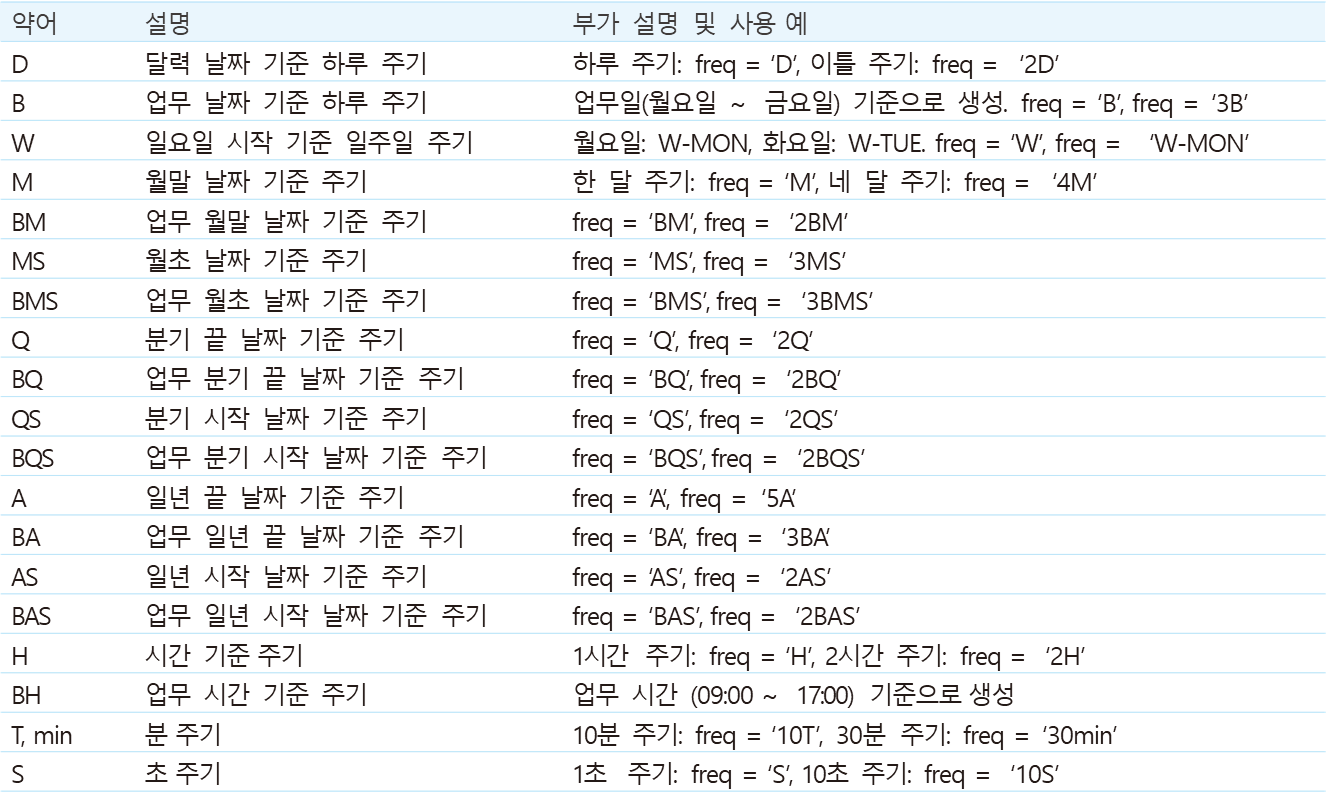

### 일별 간격으로 날짜 생성

In [9]:
# D타입
date = pd.date_range(start='2021-10-01', end='2021-10-20')
date

DatetimeIndex(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16',
               '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20'],
              dtype='datetime64[ns]', freq='D')

### 주간격으로 날짜 생성
- 지정한 일자가 포함된 주의 요일 시작 일자 기준으로 일주일 주기로 생성
- freq='W' : 일요일 기준으로 일주일 주기로 생성
- freq='W-MON' : 월요일 기준으로 일주일 주기로 생성

In [14]:
pd.date_range(start='2023-01-01', end = '2023-01-31', freq = 'W')

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [15]:
pd.date_range(start='2023-01-01', end = '2023-01-31', freq = 'W-MON')

DatetimeIndex(['2023-01-02', '2023-01-09', '2023-01-16', '2023-01-23',
               '2023-01-30'],
              dtype='datetime64[ns]', freq='W-MON')

In [16]:
pd.date_range(start='2023-01-01', periods = 4, freq = 'W-MON')

DatetimeIndex(['2023-01-02', '2023-01-09', '2023-01-16', '2023-01-23'], dtype='datetime64[ns]', freq='W-MON')

### 월간격으로 날짜 생성
- freq='M' : 월말 날짜 기준 주기
- freq='BM' : 업무 월말 날짜 기준 주기
- freq='MS' : 월초 날짜 기준 주기

In [17]:
pd.date_range(start='2023-01-01', periods=5, freq = 'M')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='M')

In [18]:
pd.date_range(start='2023-01-01', periods=5, freq = 'BM')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-28',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='BM')

In [19]:
pd.date_range(start='2023-01-01', periods=5, freq = 'MS')

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [20]:
pd.date_range(start='2023-01-01', periods=5, freq = 'BMS')

DatetimeIndex(['2023-01-02', '2023-02-01', '2023-03-01', '2023-04-03',
               '2023-05-01'],
              dtype='datetime64[ns]', freq='BMS')

### 분기별 주기로 날짜 생성
- freq = Q : 분기 끝 날짜 기준 주기
- freq = BQ : 업무 분기 끝 날짜 기준 주기
- freq = QS : 분기 시작 날짜 기준 주기

In [21]:
pd.date_range(start='2023-01-01', periods=5, freq = 'Q')

DatetimeIndex(['2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
               '2024-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [22]:
pd.date_range(start='2023-01-01', periods=5, freq = 'QS')

DatetimeIndex(['2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01',
               '2024-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [23]:
pd.date_range(start='2023-01-01', periods=5, freq = 'BQ')

DatetimeIndex(['2023-03-31', '2023-06-30', '2023-09-29', '2023-12-29',
               '2024-03-29'],
              dtype='datetime64[ns]', freq='BQ-DEC')

In [24]:
pd.date_range(start='2023-01-01', periods=5, freq = 'BQS')

DatetimeIndex(['2023-01-02', '2023-04-03', '2023-07-03', '2023-10-02',
               '2024-01-01'],
              dtype='datetime64[ns]', freq='BQS-JAN')

### 연별 주기로 날짜 생성
- freq = A : 일년 끝 날짜 기준 주기
- freq = BA : 업무 일년 끝 날짜 기준 주기
- freq = AS : 일년 시작 날짜 기준 주기

In [27]:
pd.date_range(start='2023-01-01', periods=5, freq = 'A')

DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [28]:
pd.date_range(start='2023-01-01', periods=5, freq = 'AS')

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01', '2026-01-01',
               '2027-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [29]:
pd.date_range(start='2023-01-01', periods=5, freq = 'BA')

DatetimeIndex(['2023-12-29', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31'],
              dtype='datetime64[ns]', freq='BA-DEC')

In [30]:
pd.date_range(start='2023-01-01', periods=5, freq = 'BAS')

DatetimeIndex(['2023-01-02', '2024-01-01', '2025-01-01', '2026-01-01',
               '2027-01-01'],
              dtype='datetime64[ns]', freq='BAS-JAN')

### 시간 기준 주기로 날짜와 시간 생성
- freq = H : 시간 주기
- freq = BH : 업무 시간 주기
- freq = T 또는 min : 분 주기
- freq = S : 초 주기

In [31]:
pd.date_range(start='2023-01-01', periods=10, freq = 'H')

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [35]:
pd.date_range(start='2023-01-01 09:00:30', periods=10, freq = 'H')

DatetimeIndex(['2023-01-01 09:00:30', '2023-01-01 10:00:30',
               '2023-01-01 11:00:30', '2023-01-01 12:00:30',
               '2023-01-01 13:00:30', '2023-01-01 14:00:30',
               '2023-01-01 15:00:30', '2023-01-01 16:00:30',
               '2023-01-01 17:00:30', '2023-01-01 18:00:30'],
              dtype='datetime64[ns]', freq='H')

In [36]:
pd.date_range(start='2023-01-01', periods=10, freq = 'BH')

DatetimeIndex(['2023-01-02 09:00:00', '2023-01-02 10:00:00',
               '2023-01-02 11:00:00', '2023-01-02 12:00:00',
               '2023-01-02 13:00:00', '2023-01-02 14:00:00',
               '2023-01-02 15:00:00', '2023-01-02 16:00:00',
               '2023-01-03 09:00:00', '2023-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='BH')

------------------------------------------------